# 이미지 분류 시스템 구축

## 강아지 품종 (치와와, 요크셔테리어, 진돗개, 셰퍼드) 분류
<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/27-1.png" style="max-width: 60%; height: auto;"><p>


# Training Data
<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/27-2.png" style="max-width: 60%; height: auto;"><p>


# Transfer Learning
<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/27-3.png" style="max-width: 60%; height: auto;"><p>


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.applications import MobileNet, Xception, ResNet50, InceptionV3
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Training data download

- #### [training data download: [dog_image.zip]](http://cmseng.skku.edu/CMSLecture/ML/img/dog_image.zip)

## root dir 설정 (환경에 맞게 root dir 을 변경해주면 된다) 
### download한 dog_image.zip 파일을 root_dir에 unzip

In [3]:
root_dir = '.'

In [4]:
import os
import shutil

if not os.path.exists(os.path.join(root_dir, 'dog_image/test')):
    os.mkdir(os.path.join(root_dir, 'dog_image/test'))

if not os.path.exists(os.path.join(root_dir, 'dog_image/test_image_files')):
    os.mkdir(os.path.join(root_dir, 'dog_image/test_image_files'))

In [5]:
# 데이터 전체 개수 확인

import os
import glob

label_name_list = os.listdir(os.path.join(root_dir, 'dog_image/train/'))

print('total label nums = ', len(label_name_list))
print('=================================================')
print(label_name_list)

total label nums =  4
['shepherd', 'yorkshire_terrier', 'chihuahua', 'jindo_dog']


In [6]:
import os
import shutil

if not os.path.exists(os.path.join(root_dir, 'dog_image/test')):
    os.mkdir(os.path.join(root_dir, 'dog_image/test'))

if not os.path.exists(os.path.join(root_dir, 'dog_image/test_image_files')):
    os.mkdir(os.path.join(root_dir, 'dog_image/test_image_files'))

# 2. 먼저 train -> test 디렉토리로 ratio 만큼 move

In [7]:
import os
import glob
import shutil

ratio = 0.1    # train : test = 90 : 10

src_root_dir = os.path.join(root_dir,'dog_image/train/')  # train에 사용할 데이터 위치 
dst_root_dir = os.path.join(root_dir, 'dog_image/test/')  # test에 사용할 데이터 위치 초기는 없음. 아래 코드에서 생성함.

label_name_list = os.listdir(src_root_dir)   # label(정답)은 src_root_dir 하위 디렉토리의 dir_name임. 
                                             # os.listdir 로 src_root_dir 하위 디렉토리의 dir_name 읽음.

for label_name in label_name_list:           # test 디렉토리 생성 및 하위 디렉토리로 label 디렉토리 생성
    dst_label_name_dir = dst_root_dir + label_name   # 'dog_image/test/label_name'

    if not os.path.exists(dst_label_name_dir):
        os.mkdir(dst_label_name_dir)

for label_name in label_name_list:           # label_name 별로 순자척으로 src dir => dst dir
                                             # 각 train/label_name 에서 해당 ratio만큼의 파일을 test/label_name으로 이동 
    train_image_file_list = glob.glob(src_root_dir+label_name+'/*')  # train/label_name의 모든 파일 리스트
    split_num = int(ratio*len(train_image_file_list))                # test/lable_name으로 move할 파일 개수: split_num
    test_image_file_list = train_image_file_list[0:split_num]        # train/label_name의 모든 파일 리스트 중 첫번째 ~ split_num 까지 파일 리스트  

    for image_file in test_image_file_list:
        shutil.move(image_file, dst_root_dir+label_name)    # move

In [8]:
# train : test 데이터 비율 확인

src_root_dir = os.path.join(root_dir,'dog_image/train/')
dst_root_dir = os.path.join(root_dir, 'dog_image/test/')

train_label_name_list = os.listdir(src_root_dir)
test_label_name_list = os.listdir(dst_root_dir)

train_label_name_list.sort()
test_label_name_list.sort()

if train_label_name_list != test_label_name_list:
    print('fatal error !!!!')
else:
    print(len(train_label_name_list), len(test_label_name_list))

# 데이터 개수 확인

for label_name in train_label_name_list:

    train_data_nums = len(os.listdir(src_root_dir+label_name))
    test_data_nums = len(os.listdir(dst_root_dir+label_name))

    print('train => ', label_name, train_data_nums, ' , test => ', label_name, test_data_nums)
    print('=======================================================')

4 4
train =>  chihuahua 329  , test =>  chihuahua 36
train =>  jindo_dog 324  , test =>  jindo_dog 36
train =>  shepherd 339  , test =>  shepherd 37
train =>  yorkshire_terrier 342  , test =>  yorkshire_terrier 37


# 3. test -> test_image_files 디렉토리로 copy

In [9]:
import os
import glob
import shutil

src_root_dir = os.path.join(root_dir, 'dog_image/test/')
dst_root_dir = os.path.join(root_dir, 'dog_image/test_image_files/')

label_name_list = os.listdir(src_root_dir)

for label_name in label_name_list:  # 파일 copy src dir => dst dir
    image_file_list = glob.glob(src_root_dir+label_name+'/*')
    print('total [%s] image file nums => [%s]' % (label_name ,len(image_file_list)))

    copy_nums = 0

    for image_file in image_file_list:
        shutil.copy(image_file, dst_root_dir)    # copy
        copy_nums = copy_nums + 1

    print('total copy nums => ', copy_nums)

total [shepherd] image file nums => [37]
total copy nums =>  37
total [yorkshire_terrier] image file nums => [37]
total copy nums =>  37
total [chihuahua] image file nums => [36]
total copy nums =>  36
total [jindo_dog] image file nums => [36]
total copy nums =>  36


# 4. ImageDataGenerator 설정

In [10]:
IMG_WIDTH = 224
IMG_HEIGHT = 224

train_dir = os.path.join(root_dir, 'dog_image/train/')
validation_dir = os.path.join(root_dir, 'dog_image/train/')  # validation_split=0.15
test_dir = os.path.join(root_dir, 'dog_image/test/')

In [61]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,
                                    height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                    validation_split=0.15)

validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

In [62]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=16, color_mode='rgb',
                                                class_mode='sparse', subset = 'training',
                                                target_size=(IMG_WIDTH,IMG_HEIGHT))

validation_generator = validation_datagen.flow_from_directory(validation_dir, batch_size=16, color_mode='rgb',
                                                          class_mode='sparse', subset = 'validation',
                                                          target_size=(IMG_WIDTH,IMG_HEIGHT))

Found 1136 images belonging to 4 classes.
Found 198 images belonging to 4 classes.


In [63]:
img, label = validation_generator.next()
print(img.shape, label.shape)
img, label = train_generator.next()
print(img.shape, label.shape)
print(label)

(16, 224, 224, 3) (16,)
(16, 224, 224, 3) (16,)
[0. 1. 3. 2. 0. 2. 1. 2. 2. 3. 2. 3. 3. 1. 3. 3.]


<class 'numpy.ndarray'>


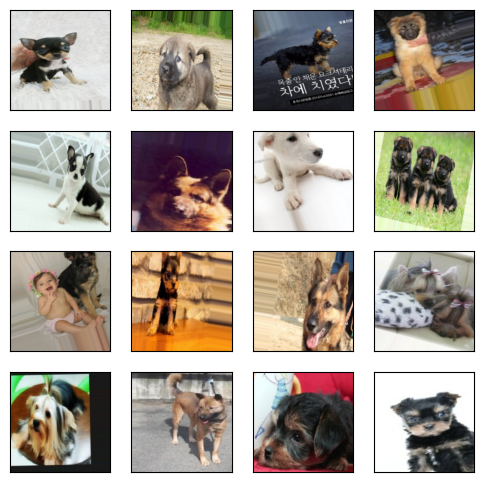

In [67]:
plt.figure(figsize=(6,6))
for i in range(len(img)):

    plt.subplot(4, int(len(img)/4), i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[i])

# plt.show()
print(type(img))

In [14]:
print(train_generator.class_indices.items())
print(validation_generator.class_indices.items())

print(len(train_generator.classes))
print(len(validation_generator.classes))

dict_items([('chihuahua', 0), ('jindo_dog', 1), ('shepherd', 2), ('yorkshire_terrier', 3)])
dict_items([('chihuahua', 0), ('jindo_dog', 1), ('shepherd', 2), ('yorkshire_terrier', 3)])
1136
198


# 5. Transfer Learning base 모델 구축

In [29]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH,IMG_HEIGHT,3))

# 6. 새로운 분류기 (Classfier) 설정

In [30]:
model = Sequential()

model.add(base_model)

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax'))

# 7. Model Compile

In [31]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(2e-5), metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 50176)             0         
                                                                 
 dense_6 (Dense)             (None, 32)                1605664   
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 4)                 132       
                                                                 
Total params: 4,834,660
Trainable params: 4,812,772
Non-trainable params: 21,888
_______________________________________

# 8. Model Learning

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

earlystopping = EarlyStopping(monitor='val_loss', patience=5)

hist = model.fit(train_generator, validation_data=validation_generator,
                 epochs=50, callbacks=[earlystopping])

Epoch 1/50


2024-01-13 22:31:31.421923: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


71/71 [==============================] - ETA: 0s - loss: 1.3855 - accuracy: 0.4269

2024-01-13 22:32:21.734271: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


71/71 [==============================] - 53s 703ms/step - loss: 1.3855 - accuracy: 0.4269 - val_loss: 0.6262 - val_accuracy: 0.7879
Epoch 2/50
71/71 [==============================] - 52s 732ms/step - loss: 0.8347 - accuracy: 0.6646 - val_loss: 0.3836 - val_accuracy: 0.8636
Epoch 3/50
71/71 [==============================] - 49s 692ms/step - loss: 0.5776 - accuracy: 0.7826 - val_loss: 0.2256 - val_accuracy: 0.9091
Epoch 4/50
71/71 [==============================] - 49s 693ms/step - loss: 0.4666 - accuracy: 0.8327 - val_loss: 0.1767 - val_accuracy: 0.9192
Epoch 5/50
71/71 [==============================] - 49s 691ms/step - loss: 0.4043 - accuracy: 0.8486 - val_loss: 0.1638 - val_accuracy: 0.9343
Epoch 6/50
71/71 [==============================] - 49s 691ms/step - loss: 0.3535 - accuracy: 0.8741 - val_loss: 0.1422 - val_accuracy: 0.9394
Epoch 7/50
71/71 [==============================] - 50s 701ms/step - loss: 0.3109 - accuracy: 0.8873 - val_loss: 0.1605 - val_accuracy: 0.9495
Epoch 8/50

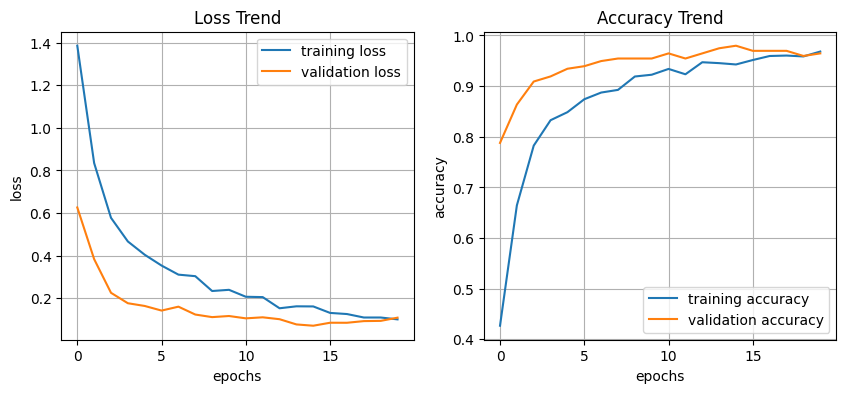

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)

plt.title('Loss Trend')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')


plt.subplot(1, 2, 2)

plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()


# 9. Test Data Generation

In [34]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [35]:
test_generator = test_datagen.flow_from_directory(test_dir, batch_size=32, color_mode='rgb',
                                              class_mode='sparse', target_size=(IMG_WIDTH,IMG_HEIGHT))

Found 146 images belonging to 4 classes.


In [36]:
model.evaluate(test_generator)

2024-01-13 22:49:27.722268: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


5/5 [==============================] - 1s 256ms/step - loss: 0.1859 - accuracy: 0.9521


[0.18585726618766785, 0.9520547986030579]

In [37]:
import random
import os
import numpy as np
import cv2
import glob

label_dict = {'chihuahua': 0, 'jindo_dog': 1, 'shepherd': 2, 'yorkshire_terrier': 3}

test_image_files_list = glob.glob(root_dir+ '/dog_image/test_image_files/*.jpg')

random.shuffle(test_image_files_list)

test_num = 16
test_image_files = test_image_files_list[:test_num]  # 태스트 파일이름은 정답.숫자.jpg

label_list = []

for i in range(len(test_image_files)):
    label = test_image_files[i].split('/')[-1].split('.')[0].strip()
    label_list.append(label_dict[label])

src_img_list = []

for i in range(len(test_image_files)):
    src_img = cv2.imread(test_image_files[i], cv2.IMREAD_COLOR)
    src_img = cv2.resize(src_img, dsize=(IMG_WIDTH, IMG_HEIGHT))
    src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
    src_img = src_img / 255.0

    src_img_list.append(src_img)

# 4차원 텐서  변환
src_img_array = np.array(src_img_list)
label_array = np.array(label_list)

print(src_img_array.shape, label_array.shape)
print(label_array)

(16, 224, 224, 3) (16,)
[3 0 2 3 3 3 3 0 1 1 0 2 1 3 0 1]


In [38]:
pred = model.predict(src_img_array)
print(pred.shape)

1/1 [==============================] - 0s 365ms/step
(16, 4)


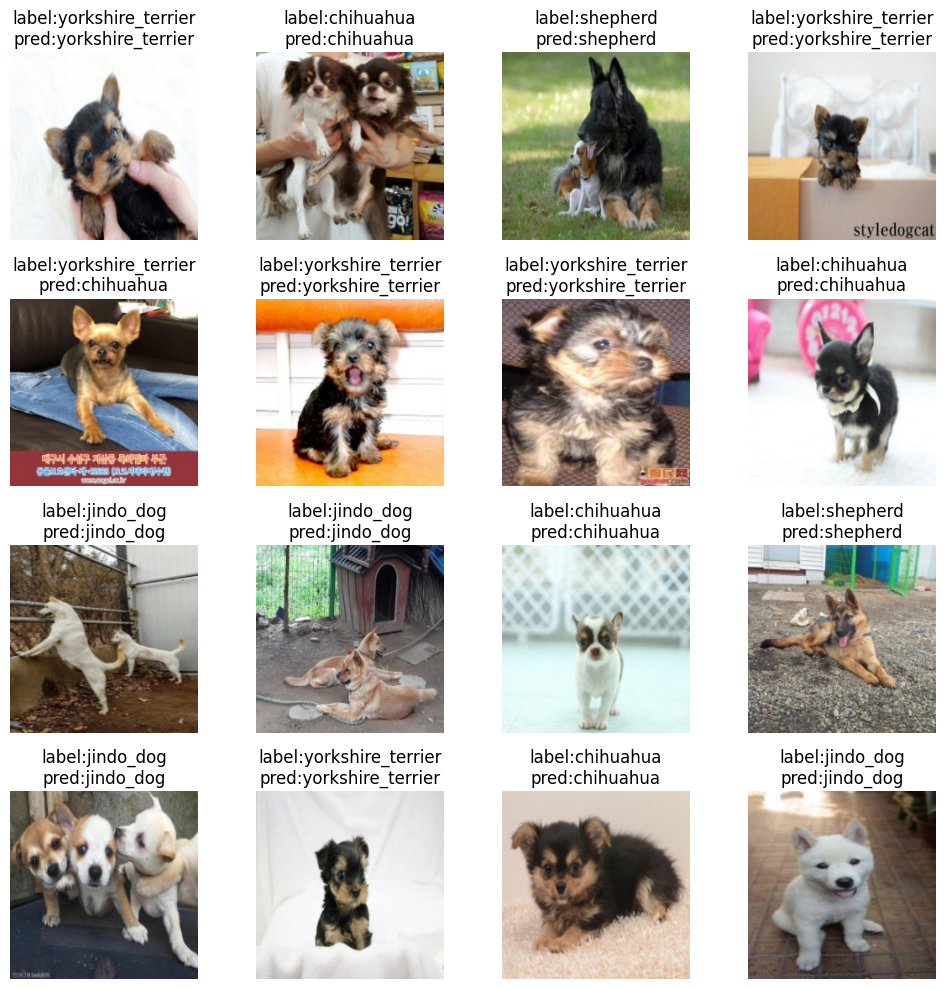

In [39]:
import matplotlib.pyplot as plt

class_names = ['chihuahua', 'jindo_dog', 'shepherd', 'yorkshire_terrier']

plt.figure(figsize=(10,10))

for pos in range(len(pred)):

    plt.subplot(4,4,pos+1)
    plt.axis('off')

    label_str = class_names[label_array[pos]]
    pred_str = class_names[np.argmax(pred[pos])]

    plt.title('label:' + label_str + '\npred:' + pred_str)

    plt.imshow(src_img_array[pos])

plt.tight_layout()
plt.show()

In [40]:
print(label_array)
print(np.argmax(pred, axis=-1))

[3 0 2 3 3 3 3 0 1 1 0 2 1 3 0 1]
[3 0 2 3 0 3 3 0 1 1 0 2 1 3 0 1]


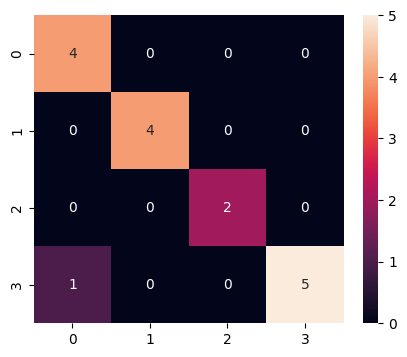

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(5, 4))

# predicted_value = model.predict(x_test)

cm = confusion_matrix(label_array,
                      np.argmax(pred, axis=-1))

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [42]:
import pandas as pd

# df=pd.DataFrame(cm)
# df
print(cm)
print('\n')

for i in range(len(np.unique(label_array))):
    print(('label = %d\t(%d/%d)\taccuracy = %.3f') % 
          (i, np.max(cm[i]), np.sum(cm[i]), 
           np.max(cm[i])/np.sum(cm[i])))

[[4 0 0 0]
 [0 4 0 0]
 [0 0 2 0]
 [1 0 0 5]]


label = 0	(4/4)	accuracy = 1.000
label = 1	(4/4)	accuracy = 1.000
label = 2	(2/2)	accuracy = 1.000
label = 3	(5/6)	accuracy = 0.833
